# AGNES

###### # -*- coding: utf-8 -*-
###### # @Time : 2022/4/21
###### # @EMAIL： duanyu@bjtu.edu.cn
###### # @Software: PyCharm

### 编程实现层次聚类算法（AGNES）对鸢尾花数据集进行聚类分类，需画图比较不同聚类簇数和距离度量函数对结果的影响。

<class 'numpy.ndarray'>


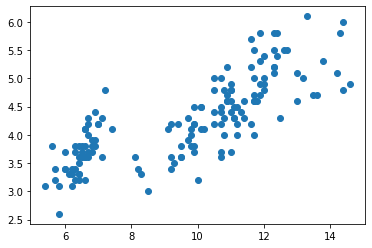

In [5]:
from sklearn.datasets import load_iris
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = load_iris()
X = data['data']
plt.scatter(X[:, 0]+X[:, 2], X[:, 1]+X[:, 3], marker='o')
plt.show()

In [6]:
#import pandas as pd
#import numpy as np
#class AGNES(object):
#
#    def __init__(self,X,n_cluster=2,p=2):
#        self.X = X
#        self.p = p
#        self.n_clusters = n_cluster
#        self.dist_mat = self.get_dist_mat()
#
#
#    def get_dist_mat(self):
#        matsize = len(self.X)
#        dist_mat = pd.DataFrame(matsize,matsize)
#        for i in range(matsize):
#            for j in range(matsize):
#                dist_mat.loc[i,j]=self.Minkowski(self.X[i],self.X[j])
#                if i<=j:
#                    continue
#        return dist_mat
#
#   def Minkowski(self,a,b):
#       p = self.p
#       return (np.sum((a-b)**p))**(1.0/p)


Dist_fun:euclidean, c_clusters=2, score=280.8392024579737
Dist_fun:euclidean, c_clusters=3, score=485.9050227341817
Dist_fun:euclidean, c_clusters=4, score=495.18162297307987
Dist_fun:euclidean, c_clusters=5, score=414.39248474403956
Dist_fun:euclidean, c_clusters=6, score=455.4931301806755
Dist_fun:euclidean, c_clusters=7, score=423.719756619745
Dist_fun:euclidean, c_clusters=8, score=414.7145531825739
Dist_fun:euclidean, c_clusters=9, score=372.2046403894426
Dist_fun:l1, c_clusters=2, score=97.14981198159457
Dist_fun:l1, c_clusters=3, score=552.2561616535166
Dist_fun:l1, c_clusters=4, score=513.2738759819965
Dist_fun:l1, c_clusters=5, score=462.2702488596455
Dist_fun:l1, c_clusters=6, score=419.21865607939975
Dist_fun:l1, c_clusters=7, score=374.52910149152734
Dist_fun:l1, c_clusters=8, score=372.1505587761138
Dist_fun:l1, c_clusters=9, score=344.75623316592174
Dist_fun:manhattan, c_clusters=2, score=97.14981198159457
Dist_fun:manhattan, c_clusters=3, score=552.2561616535166
Dist_fun

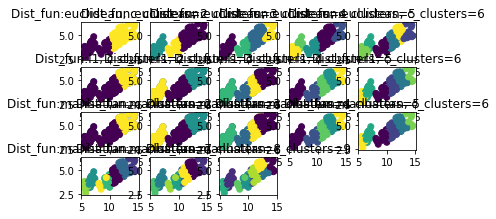

Best Params: ['l1', 3]


In [15]:
from sklearn.cluster import AgglomerativeClustering

max_score = -1
best_param = [-1,-1]
for j,distfun in enumerate(('euclidean','l1', 'manhattan')):
    for n in range(2,10):
        y_pred = AgglomerativeClustering(n_clusters=n,linkage='complete', affinity=distfun).fit_predict(X)
        score = metrics.calinski_harabasz_score(X, y_pred)
        if score > max_score:
            max_score = score
            best_param = [distfun,n]
        print('Dist_fun:{}, c_clusters={}, score={}'.format(distfun,n,score))
        plt.subplot(5,5,n-1+j*5)
        plt.scatter(X[:, 0]+X[:, 2], X[:, 1]+X[:, 3], marker='o', c=y_pred)
        plt.title('Dist_fun:{}, c_clusters={}'.format(distfun,n))
plt.show()
print("Best Params:",best_param)

### 最佳模型

Dist_fun:manhattan, c_clusters=9, score=552.2561616535166


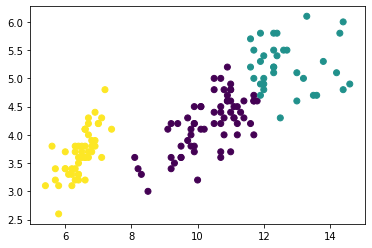

In [17]:
y_pred = AgglomerativeClustering(n_clusters=3,linkage='complete', affinity='l1').fit_predict(X)
score = metrics.calinski_harabasz_score(X, y_pred)
print('Dist_fun:{}, c_clusters={}, score={}'.format(distfun,n,score))
plt.scatter(X[:, 0]+X[:, 2], X[:, 1]+X[:, 3], marker='o', c=y_pred)
plt.show()